<a href="https://colab.research.google.com/github/beckman9191/ECE1513-Introduction-to-Machine-Learning/blob/main/ECE1513_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/indian-liver-patient-records

indian-liver-patient-records.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'indian-liver-patient-records.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


a)

**Supervised Learning**: Given input features, target features, and training examples, predict the value of the target features for new examples given their value on the input features

**Unsupervised Learning**: Learning classifications when the examples do not hvae targets defined. Clustering and dimensionality reduction are common techniques.

**self-supervised learning**: This is a deep learning methodology where a model is pre-trained using unlabelled data. Labels are automatically generated from the unstructured input data. (e.g Face Detection, Signature Acknowledgement, Context Filling etc.)

**Data splitting into training and testing**: Data is often split into two parts: a training set and a test set. The training set is used to train the model, and the test set is used to evaluate it.

**Cross Validation**: This is a technique to evaluate the model performance. Data is divided into k folds. The model is trained using k-1 folds and test on the remaining fold. Repeat this process by k times with different test set each time. The average performance across the interations will provide a more robust evaluation.

**Confusion Matrix**: It is a table that is used to evaluate the performance of classification models. It consists of the number of true positive(TP), true negative(TN), false positive(FP) and false negative(FN). It can provide a detailed performance beyond simple accuracy.

**Accuracy for Model evaluation**: It is the ratio of the number of correct predictions to the total number of predictions.

**Sensitivity for Model evaluation**: It is the ratio of correctly predicted positive observations to all actual positives. It indicates how well a machine learning model can detect positive instance.

**Specificity for Model evaluation**: It is the ratio of correctly predicted negative observations to all actual negatives, which is represented by the total number of true negatives divided by the total number of actual negatives

**Underfitting**: It is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high error rate on both the training set and unseen data. It occurs when a model is too simple to capture underlying patterns in the data, resulting in poor performance.

**Overfitting**: It occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data.

**Balanced and unbalanced datasets**: A balanced dataset has an approximately equal number of samples for each class, while an unbalanced dataset has high different number of samples for each class. Unbalanced datasets may lead to biased models as they might perform well on some classes but perform bad on other classes

**Normalization vs standardization**: Normalization means rescaling features to a range of [0, 1] using the minimum and maximum values of the feature. Standardization means rescaling features to have a mean of 0 and a standard deviation of 1.

**Neural networks**: It is a computational models inspired by the human brain's architecture. It consists of layers of interconnected neurons and are powerful for tasks like image and speech recognition. Training mainly focus on adjusting weights between neurons to minimize the error.

**Large Language Models**: It is a model that aims to recognize and generate text, among other tasks. It is trained on huge sets of data to learn billions of parameters during training and consuming large computational resouces during the training and operation.



In [ ]:
#b)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
def load_and_split_data(file_path):
  df=pd.read_csv(file_path)
  df=df.fillna(0)
  y=df['Dataset']
  X=df.drop(['Dataset'], axis=1)
  X['Gender']=np.where(X['Gender']=='Male',1,0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  return X_train, X_test, y_train, y_test

filepath = 'indian_liver_patient.csv'
X_train, X_test, y_train, y_test = load_and_split_data(filepath)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [ ]:
#c)

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Logistic Regression
#instantiate the model
log_regression = LogisticRegression(max_iter=10000)
# fit the model with data
log_regression.fit(X_train, y_train)
y_pred_log_train=log_regression.predict(X_train)
y_pred_log_test=log_regression.predict(X_test)
print("------------------Logistic Regression------------------")
print("Training accuracy for Logistic Regression:",metrics.accuracy_score(y_train, y_pred_log_train))
print("Test accuracy for Logistic Regression:",metrics.accuracy_score(y_test, y_pred_log_test))

#Support Vector Machine
clf=svm.SVC()
clf.fit(X_train, y_train)
y_pred_svc_train=clf.predict(X_train)
y_pred_svc_test=clf.predict(X_test)
print("------------------Support Vector Machine------------------")
print("Training accuracy for SVM:",metrics.accuracy_score(y_train, y_pred_svc_train))
print("Test accuracy for SVM:",metrics.accuracy_score(y_test, y_pred_svc_test))

#DecisionTreeClassfier
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt_train=dt.predict(X_train)
y_pred_dt_test=dt.predict(X_test)
print("------------------DecisionTreeClassfier------------------")
print("Training accuracy for DecisionTreeClassifier:",metrics.accuracy_score(y_train, y_pred_dt_train))
print("Test accuracy for DecisionTreeClassifier:",metrics.accuracy_score(y_test, y_pred_dt_test))

#LDA Classifier
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda_train=lda.predict(X_train)
y_pred_lda_test=lda.predict(X_test)
print("------------------LDA Classfier------------------")
print("Training accuracy for LDA Classifier:",metrics.accuracy_score(y_train, y_pred_lda_train))
print("Test accuracy for LDA Classifier:",metrics.accuracy_score(y_test, y_pred_lda_test))


------------------Logistic Regression------------------
Training accuracy for Logistic Regression: 0.7205882352941176
Test accuracy for Logistic Regression: 0.7028571428571428
------------------Support Vector Machine------------------
Training accuracy for SVM: 0.7230392156862745
Test accuracy for SVM: 0.6914285714285714
------------------DecisionTreeClassfier------------------
Training accuracy for DecisionTreeClassifier: 1.0
Test accuracy for DecisionTreeClassifier: 0.6628571428571428
------------------LDA Classfier------------------
Training accuracy for LDA Classifier: 0.7230392156862745
Test accuracy for LDA Classifier: 0.6914285714285714


d)
## Table

Model | Training Accuracy | Test Accuracy
--- | --- | ---
`Logistic Regression` | 0.7206 | 0.7029
`Support Vector Machine` | 0.7230 | 0.6914
`DecisionTreeClassfier` | 1.0 | 0.6629
`LDA Classifier` | 0.7230 | 0.6914


**Logistic Regression**: This is a linear model for binary classification. It predicts the probability by applying the sigmoid function to a linear combination of imput features.

**Support Vector Machine**: SVM algorithm tries to find the optimal hyperlane in an N-dimensional space that can separate the data points in different classes in the feature space.

**Decision Tree Classifier**: It is a tree structure where each internal node demotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It asks a series of questions and makes a decision based on the answer to those questions.

**linear Discriminant Analysis Classifier**: It is a technique used to find a linear combination of features that best separates the classes in a dataset.  It reduces dimensionality while preserving as much of the class discriminatory information as possible.



**Comparison**:

For training accuracy, Decision Tree has the highest accuracy (=1), followed by LDA classifier, SVM and Logistic Regression.
For Test accuracy, Logistic Regression has the highest accuracy, closely followed by LDA classifier, SVM and Decision Tree.



**Recommendation**:

From my point of view, I think Logistic Regression is the best as it has the highest test accuracy and relative high training accuracy.



**Downsides of the other models**:

**SVM**: It is sensitive to noise and outliers and it can be computationally expensive. The choice of the kernel function also affect the performance.

**Decision Tree**: Decision Trees are prone to overfitting. Also, it can have high variance and a small change in the input data can lead to a different tree structure.

**LDA Classifier**: It is sensitive to outliers and may not perform well for imbalanced classes as it might be biased towards the majority class.








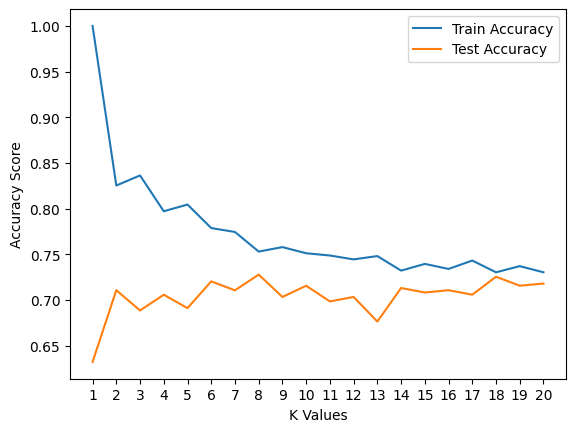

In [ ]:
#e)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
k_values = [i for i in range (1,21)]
def select_knn_model():
  test_scores=[]
  train_scores=[]
  for i in k_values:
    KNN=KNeighborsClassifier(n_neighbors=i)
    scores=cross_validate(KNN, X_train, y_train, return_train_score=True)
    test_scores.append(scores['test_score'].mean())
    train_scores.append(scores['train_score'].mean())

  return train_scores, test_scores

knn=select_knn_model()
training_accuracy=knn[0]
validation_accuracy=knn[1]


plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

plt.plot(k_values, [x for x in training_accuracy], label='Train Accuracy')
plt.plot(k_values, [x for x in validation_accuracy], label='Test Accuracy')
plt.xticks(range(1,21))
plt.legend()



e)

The test accuracy is highest when k=18. I think this is because lower k captured more noise. As we can see, the accuracy became more smooth for k>14 and it reaches the peak at k=18.

f)

This dataset is not balanced (416 liver patient records, 167 non liver patient records).

There are several ways to enhance the training performance such as removing outliers, creating new features and hyperparameter tuning etc.

Instead of looking at the overall accuracy, we could focus on the sensitivity and specificity evaluate the performance of unbalanced datasets. If we want to balance it, we could adjust the number of positive and negative cases to roughly the same. For example, we could add 250 more liver patient records or reduce the liver patient records to 170.

In [ ]:
#g)
from sklearn.inspection import permutation_importance
df=pd.read_csv('indian_liver_patient.csv')

for col in df.columns:
  features_name.append(col)
features_name.pop()


#Logistic Regression
logr_importance=permutation_importance(log_regression, X_train, y_train, n_repeats=10, random_state=0)
#plt.errorbar(range(1, 11), logr_importance.importances_mean, logr_importance.importances_std, linestyle='None')
sort_index_logr = np.argsort(logr_importance.importances_mean)
sort_index_logr=np.flip(sort_index_logr)

logr_top_three_feature=[]
for i in range(0, 3):
  logr_top_three_feature.append(features_name[sort_index_logr[i]])
print("Top 3 features for Logistic Regression is ", logr_top_three_feature)

#SVM
SVM_importance=permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=0)
sort_index_SVM = np.argsort(SVM_importance.importances_mean)
sort_index_SVM=np.flip(sort_index_SVM)
SVM_top_three_feature=[]
for i in range(0, 3):
  SVM_top_three_feature.append(features_name[sort_index_SVM[i]])
print("Top 3 features for SVM is ", SVM_top_three_feature)

#DecisionTreeClassifier
dt_importance=permutation_importance(dt, X_train, y_train, n_repeats=10, random_state=0)
sort_index_dt = np.argsort(dt_importance.importances_mean)
sort_index_dt=np.flip(sort_index_dt)
dt_top_three_feature=[]
for i in range(0, 3):
  dt_top_three_feature.append(features_name[sort_index_dt[i]])
print("Top 3 features for DecisionTreeClassifier is ", dt_top_three_feature)

#LDA Classifier
lda_importance=permutation_importance(lda, X_train, y_train, n_repeats=10, random_state=0)
sort_index_lda = np.argsort(lda_importance.importances_mean)
sort_index_lda=np.flip(sort_index_lda)
lda_top_three_feature=[]
for i in range(0, 3):
  lda_top_three_feature.append(features_name[sort_index_lda[i]])
print("Top 3 features for LDA Classifier is ", lda_top_three_feature)

Top 3 features for Logistic Regression is  ['Albumin', 'Total_Protiens', 'Age']
Top 3 features for SVM is  ['Age', 'Albumin', 'Total_Protiens']
Top 3 features for DecisionTreeClassifier is  ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase']
Top 3 features for LDA Classifier is  ['Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase']


g)

Those classifiers do not agree on which features are important due to algorithm differences. hyperparameter settings, different objective functions and differences in noise and overfitting issue.